<H1 style="color:#8B7959">AFP Project - ADIA</H1>

<H2 style="color:#8B7959">Import Dev Code</H2>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

github_folder_path = r'..'  # Relative path
if github_folder_path not in sys.path:
    sys.path.append(github_folder_path)

In [3]:
from L0_Library.config import *
from L1_Dev.data_prep import DataPrep
from L1_Dev.news import News
from L1_Dev.clusters import Clusters

<H2 style="color:#8B7959">Get Data</H2>

##### Import Data from Databento: ~40 minutes for 1 year of 1 (liquid) stock

In [4]:
pipeline = DataPrep(API_key='db-SEbmRhQ3ekjnrdRQLfK4iDYJhVkrL',
                    dataset='XNAS.ITCH',
                    start_date=datetime(2019, 1, 1),  # Might be good to use datetime.date
                    start_hour=9,
                    start_minute=30,
                    end_date=datetime(2019, 12, 31),
                    end_hour=16,
                    end_minute=0,
                    time_zone='US/Eastern')

##### Import Saved Data: TESLA 2019 orderbook

In [5]:
hdf5_file_path = '../Data/TSLA_data.h5'

with pd.HDFStore(hdf5_file_path, 'r') as hdf_store:
    all_keys = hdf_store.keys()
    dataframes = {key.lstrip('/'): hdf_store[key] for key in all_keys}

df_prices = dataframes['prices']
df_returns = dataframes['returns']
df_bipower_variation = dataframes['bipower_variation']
df_f0 = dataframes['periodicity_0']
df_f1 = dataframes['periodicity_1']
df_f = dataframes['periodicity']
df_jump_score = dataframes['jump_score']
df_jumps = dataframes['jumps']

<H3 style="color:#8B7959">PRICES</H3>

In [6]:
# Calculate prices
df_prices.map(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,306.13,307.92,306.2,nan,nan,322.04,341.91,335.66,334.03,341.91,...,nan,412.29,417.74,nan,428.94,434.38,nan,nan,427.53,403.89
09:31:00,308.77,307.73,303.9,nan,nan,320.53,340.88,333.94,335.35,342.98,...,nan,410.63,416.86,nan,428.12,432.85,nan,nan,427.52,405.19
09:32:00,307.96,306.83,303.94,nan,nan,320.73,340.23,332.61,335.2,343.38,...,nan,411.1,416.02,nan,427.35,431.51,nan,nan,425.18,407.68
09:33:00,305.87,305.42,304.15,nan,nan,320.24,341.32,333.57,334.98,342.46,...,nan,411.76,415.44,nan,427.12,432.59,nan,nan,423.35,409.65
09:34:00,304.55,305.69,304.7,nan,nan,320.82,341.62,333.91,335.7,342.41,...,nan,413.63,414.32,nan,427.08,433.51,nan,nan,421.99,409.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,309.69,301.07,316.81,nan,nan,335.3,334.99,338.36,345.1,347.49,...,nan,418.72,425.17,nan,430.99,430.2,nan,nan,414.55,418.48
15:56:00,309.31,300.64,317.2,nan,nan,334.8,334.94,338.86,344.63,347.45,...,nan,418.77,425.27,nan,431.11,430.21,nan,nan,414.66,418.19
15:57:00,309.3,300.46,317.75,nan,nan,334.72,335.08,338.76,344.82,347.33,...,nan,418.82,425.17,nan,430.99,430.33,nan,nan,414.63,417.78


<H3 style="color:#8B7959">RETURNS</H3>

In [7]:
# Calculate returns
df_returns.map(lambda x: '{:.6f}'.format(x).rstrip('0').rstrip('.'))

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
09:31:00,0.008587,-0.000621,-0.007554,nan,nan,-0.004706,-0.003031,-0.005126,0.003935,0.003118,...,nan,-0.004032,-0.002124,nan,-0.001916,-0.003548,nan,nan,-0.000035,0.003193
09:32:00,-0.00263,-0.00292,0.000145,nan,nan,0.000644,-0.001906,-0.004009,-0.00044,0.001176,...,nan,0.001126,-0.002013,nan,-0.001789,-0.003096,nan,nan,-0.005477,0.006143
09:33:00,-0.006792,-0.004591,0.000669,nan,nan,-0.001532,0.003212,0.002888,-0.000658,-0.002684,...,nan,0.001626,-0.001399,nan,-0.000554,0.002514,nan,nan,-0.004316,0.004802
09:34:00,-0.004345,0.000871,0.001822,nan,nan,0.001813,0.000888,0.00101,0.002141,-0.000152,...,nan,0.004531,-0.002687,nan,-0.000082,0.002116,nan,nan,-0.003209,0.000341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,0.00162,-0.000223,-0.000398,nan,nan,-0.000353,0.000385,0.000149,-0.000452,-0.000136,...,nan,0.001006,0.000034,nan,0.00044,0.00059,nan,nan,0.000047,0.000439
15:56:00,-0.001249,-0.001443,0.001249,nan,nan,-0.001489,-0.000135,0.00149,-0.001359,-0.000141,...,nan,0.000132,0.000245,nan,0.000286,0.000029,nan,nan,0.000262,-0.000683
15:57:00,-0.000011,-0.000584,0.00172,nan,nan,-0.000234,0.000392,-0.000302,0.000548,-0.000338,...,nan,0.000116,-0.000245,nan,-0.000276,0.00027,nan,nan,-0.000061,-0.001001


<H3 style="color:#8B7959">BIPOWER VARIATION</H3>

In [8]:
# Calculate bipower variation
np.sqrt(df_bipower_variation)

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0.0016193954,0.0011803771,NaN,NaN,0.0010594234,0.0011657521,0.0010715485,0.0009709862,0.0009255794,...,NaN,0.0008536577,0.0007257953,NaN,0.0007043864,0.0005814670,NaN,NaN,0.0008271857,0.0010439035
09:32:00,NaN,0.0015932901,0.0011791472,NaN,NaN,0.0010631078,0.0011704990,0.0010990309,0.0009310343,0.0009297893,...,NaN,0.0008427773,0.0007250621,NaN,0.0007138606,0.0006071358,NaN,NaN,0.0008004068,0.0010808210
09:33:00,NaN,0.0015876364,0.0011561318,NaN,NaN,0.0010647970,0.0011793235,0.0011090113,0.0009062205,0.0009359921,...,NaN,0.0008368622,0.0007277990,NaN,0.0007166349,0.0006293166,NaN,NaN,0.0008394495,0.0010917130
09:34:00,NaN,0.0015548555,0.0011512643,NaN,NaN,0.0010677517,0.0011794479,0.0011091314,0.0009028530,0.0009338306,...,NaN,0.0008421211,0.0007177129,NaN,0.0007167402,0.0006460140,NaN,NaN,0.0008597175,0.0010688977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0.0011841933,0.0010558729,NaN,NaN,0.0011688566,0.0010755634,0.0009683962,0.0009251973,0.0008083187,...,NaN,0.0007262231,0.0007049040,NaN,0.0005776206,0.0008298960,NaN,NaN,0.0010427429,0.0008686727
15:56:00,NaN,0.0011812891,0.0010562095,NaN,NaN,0.0011689059,0.0010746728,0.0009687497,0.0009260554,0.0008068296,...,NaN,0.0007262757,0.0007048951,NaN,0.0005780315,0.0008296311,NaN,NaN,0.0010427337,0.0008693402
15:57:00,NaN,0.0011827065,0.0010587011,NaN,NaN,0.0011657940,0.0010741162,0.0009695775,0.0009266988,0.0008050816,...,NaN,0.0007260755,0.0007049223,NaN,0.0005780975,0.0008294579,NaN,NaN,0.0010427494,0.0008708904


<H3 style="color:#8B7959">PERIODICITY</H3>

In [9]:
# Calculate periodicity
df_std_returns_1 = df_returns / np.sqrt(df_bipower_variation)
df_f0 = pipeline.df_periodicity(df_input=df_std_returns_1, threshold=16)
df_std_returns_2 = df_std_returns_1 / df_f0
df_f1 = pipeline.df_periodicity(df_input=df_std_returns_2, threshold=6.635)
df_f = df_f0 * df_f1
df_f

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,3.42020,3.42020,NaN,NaN,3.42020,3.42020,3.42020,3.42020,3.42020,...,NaN,3.42020,3.42020,NaN,3.42020,3.42020,NaN,NaN,3.42020,3.42020
09:32:00,NaN,3.06144,3.06144,NaN,NaN,3.06144,3.06144,3.06144,3.06144,3.06144,...,NaN,3.06144,3.06144,NaN,3.06144,3.06144,NaN,NaN,3.06144,3.06144
09:33:00,NaN,3.02404,3.02404,NaN,NaN,3.02404,3.02404,3.02404,3.02404,3.02404,...,NaN,3.02404,3.02404,NaN,3.02404,3.02404,NaN,NaN,3.02404,3.02404
09:34:00,NaN,2.59493,2.59493,NaN,NaN,2.59493,2.59493,2.59493,2.59493,2.59493,...,NaN,2.59493,2.59493,NaN,2.59493,2.59493,NaN,NaN,2.59493,2.59493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,1.02725,1.02725,NaN,NaN,1.02725,1.02725,1.02725,1.02725,1.02725,...,NaN,1.02725,1.02725,NaN,1.02725,1.02725,NaN,NaN,1.02725,1.02725
15:56:00,NaN,0.76007,0.76007,NaN,NaN,0.76007,0.76007,0.76007,0.76007,0.76007,...,NaN,0.76007,0.76007,NaN,0.76007,0.76007,NaN,NaN,0.76007,0.76007
15:57:00,NaN,0.78978,0.78978,NaN,NaN,0.78978,0.78978,0.78978,0.78978,0.78978,...,NaN,0.78978,0.78978,NaN,0.78978,0.78978,NaN,NaN,0.78978,0.78978


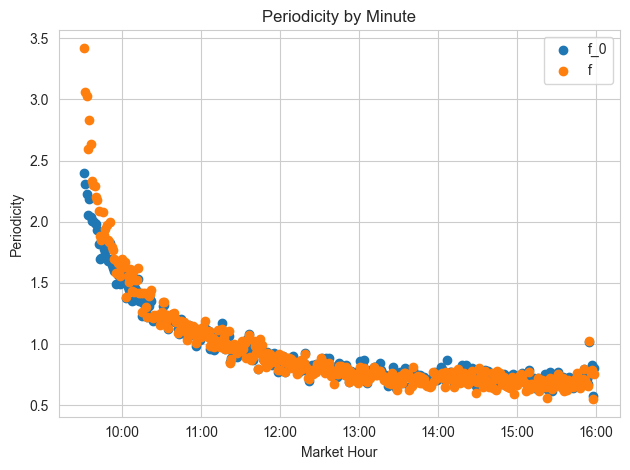

In [10]:
# Plot periodicity
%matplotlib inline
sns.set_style("whitegrid")
plt.scatter(pd.to_datetime(df_f0.index, format='%H:%M:%S'), df_f0.iloc[:, 1], label='f_0', marker='o')
plt.scatter(pd.to_datetime(df_f.index, format='%H:%M:%S'), df_f.iloc[:, 1], label='f', marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=0)
plt.xlabel('Market Hour')
plt.ylabel('Periodicity')
plt.title('Periodicity by Minute')
plt.legend()
plt.tight_layout()
plt.show()

<H3 style="color:#8B7959">JUMP SCORE</H3>

In [11]:
# Calculate jump score
df_jump_score = pipeline.jump_score(df_returns=df_returns, df_bipower_variation=df_bipower_variation, df_f=df_f)
df_jump_score

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,-0.11211,-1.87105,NaN,NaN,-1.29883,-0.76026,-1.39858,1.18481,0.98491,...,NaN,-1.38083,-0.85564,NaN,-0.79520,-1.78403,NaN,NaN,-0.01227,0.89434
09:32:00,NaN,-0.59866,0.04014,NaN,NaN,0.19789,-0.53190,-1.19160,-0.15442,0.41309,...,NaN,0.43639,-0.90692,NaN,-0.81879,-1.66556,NaN,NaN,-2.23530,1.85654
09:33:00,NaN,-0.95630,0.19125,NaN,NaN,-0.47592,0.90067,0.86120,-0.24013,-0.94815,...,NaN,0.64258,-0.63550,NaN,-0.25552,1.32099,NaN,NaN,-1.70003,1.45451
09:34:00,NaN,0.21592,0.60999,NaN,NaN,0.65447,0.29006,0.35098,0.91379,-0.06273,...,NaN,2.07347,-1.44257,NaN,-0.04384,1.26206,NaN,NaN,-1.43828,0.12310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,-0.18309,-0.36738,NaN,NaN,-0.29432,0.34830,0.14936,-0.47593,-0.16354,...,NaN,1.34811,0.04648,NaN,0.74155,0.69157,NaN,NaN,0.04360,0.49141
15:56:00,NaN,-1.60753,1.55530,NaN,NaN,-1.67549,-0.16470,2.02322,-1.93082,-0.22946,...,NaN,0.23940,0.45723,NaN,0.65089,0.04563,NaN,NaN,0.33034,-1.03382
15:57:00,NaN,-0.62543,2.05764,NaN,NaN,-0.25458,0.46225,-0.39456,0.74931,-0.53157,...,NaN,0.20276,-0.44001,NaN,-0.60443,0.41158,NaN,NaN,-0.07374,-1.45570


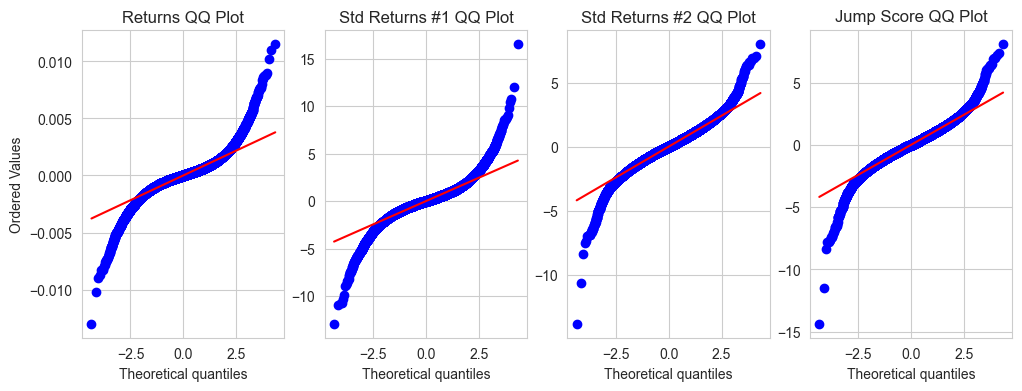

In [12]:
# Calculate quantiles and generate the QQ plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
stats.probplot(df_returns.unstack().dropna(), dist='norm', plot=axes[0])
axes[0].set_title('Returns QQ Plot')
axes[0].set_ylabel('Ordered Values')
stats.probplot(df_std_returns_1.unstack().dropna(), dist='norm', plot=axes[1])
axes[1].set_title('Std Returns #1 QQ Plot')
axes[1].set_ylabel('')
stats.probplot(df_std_returns_2.unstack().dropna(), dist='norm', plot=axes[2])
axes[2].set_title('Std Returns #2 QQ Plot')
axes[2].set_ylabel('')
stats.probplot(df_jump_score.unstack().dropna(), dist='norm', plot=axes[3])
axes[3].set_title('Jump Score QQ Plot')
axes[3].set_ylabel('')
plt.show()

<H3 style="color:#8B7959">JUMPS</H3>

In [13]:
# Get jumps
df_jumps = pipeline.get_jumps(df_input=df_jump_score)
df_jumps
# Filter jumps
# df_jumps[(df_jumps.index < pd.to_datetime('09:37:00').time())]
# df_jumps.loc[pd.to_datetime('09:37:00').time(), '2019-01-03']

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


In [14]:
print(f'Total Number of Jumps Detected: {df_jumps.sum().sum()}')

Total Number of Jumps Detected: 141.0


In [15]:
clusters = Clusters()

In [24]:
list_dates_w_jumps = clusters.get_dates_with_jumps(df_input=df_jumps)
# list_dates_w_jumps

AttributeError: 'Clusters' object has no attribute 'get_dates_with_jumps'

In [17]:
plot_date = 75
ax = abs(df_jump_score[list_dates_w_jumps[plot_date]]).plot(ylabel='Jump Score',
                                                            title=f'Jump Scores on {list_dates_w_jumps[plot_date]}', alpha=0.7)
markers = [i if i > 4.36 else np.nan for i in abs(df_jump_score[list_dates_w_jumps[plot_date]])]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

NameError: name 'list_dates_w_jumps' is not defined

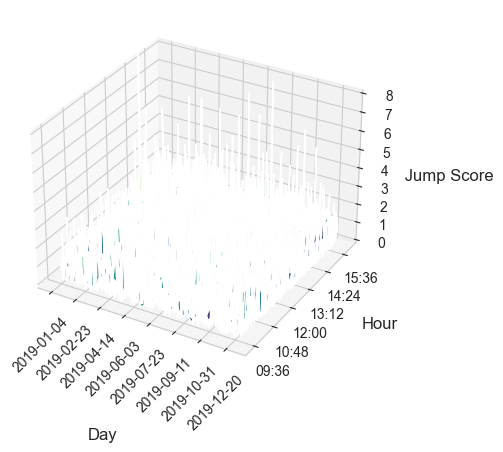

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_indices = pd.to_datetime(df_jump_score.columns, format='%Y-%m-%d')
y_indices = pd.to_datetime(df_jump_score.index, format='%H:%M:%S')

# Convert datetime values to numerical values
x_values = mdates.date2num(x_indices)
y_values = mdates.date2num(y_indices)

X, Y = np.meshgrid(x_values, y_values)

Z = np.abs(df_jump_score.values)

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=0)

x_label = 'Day'
ax.text2D(0.25, -0.15, x_label, transform=ax.transAxes, fontsize=12, verticalalignment='center', horizontalalignment='center')

y_label = 'Hour'
ax.text2D(1.0, 0.15, y_label, transform=ax.transAxes, fontsize=12, verticalalignment='center', horizontalalignment='center')

z_label = '      Jump Score'
ax.text2D(1.15, 0.55, z_label, transform=ax.transAxes, fontsize=12, verticalalignment='center', horizontalalignment='center')

ax.set_zlim(0, 8)

plt.show()


<H3 style="color:#8B7959">CLUSTERED JUMPS</H3>

In [19]:
df_inter_times = clusters.calculate_jump_inter_times(df_input=df_jumps, list_input=list_dates_w_jumps)
# df_inter_times

NameError: name 'list_dates_w_jumps' is not defined

In [20]:
df_bernoulli_p = clusters.bernoulli_trials_p(df_input=df_jumps, rolling_window=7800) # Fix prob 0 which makes threshold inf
# df_bernoulli_p

In [21]:
# Sample list with zeros
data = pd.Series([1, 0, 0, 2, np.nan, 0, 0, 3, 0, 0, 0, 0, 4])

# Initialize a variable to keep track of the last non-zero value
last_non_zero = None

# Iterate through the list and fill forward with the last non-zero value
data = data.dropna().reset_index(drop=True)
# print(data)
for i in range(len(data)):
    if data[i] != 0:
        last_non_zero = data[i]
    elif last_non_zero is not None:
        data[i] = last_non_zero

# Print the modified list
# print(data)

In [22]:
df_threshold = clusters.bernoulli_hypothesis_threshold(df_input=df_bernoulli_p)
# df_threshold

In [23]:
df_clustered_jumps = clusters.cluster_jumps(df_jumps=df_jumps, df_inter_times=df_inter_times, df_threshold=df_threshold,
                                            list_dates_w_jumps=list_dates_w_jumps)
# df_clustered_jumps

NameError: name 'df_inter_times' is not defined

In [25]:
print(f'Total Number of Jump Clusters Detected: {df_clustered_jumps.sum().sum()}')

NameError: name 'df_clustered_jumps' is not defined

In [26]:
plot_date = 75
ax = abs(df_jump_score[list_dates_w_jumps[plot_date]]).plot(ylabel='Jump Score',
                                                            title=f'Clustered Jump Scores on {list_dates_w_jumps[plot_date]}', alpha=0.7)
markers = [value if (value > 4.36) & (df_clustered_jumps[list_dates_w_jumps[plot_date]].iloc[index] == 1) \
           else np.nan for index, value in enumerate(abs(df_jump_score[list_dates_w_jumps[plot_date]]))]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

NameError: name 'list_dates_w_jumps' is not defined

<H3 style="color:#8B7959">POWER-LAW FITTING</H3>

In [27]:
abs(df_jump_score[list_dates_w_jumps[3]]).plot()

NameError: name 'list_dates_w_jumps' is not defined

In [28]:
test = df_jump_score[list_dates_w_jumps[3]].dropna().reset_index(drop=True)
# test[test == -6.956441675069235]

NameError: name 'list_dates_w_jumps' is not defined

In [29]:
test_double = pd.DataFrame(test[252:388])
test = pd.DataFrame(test[320:388])
# test

NameError: name 'test' is not defined

In [30]:
test.index = test.index - 320
test_double.index = test_double.index - 320

NameError: name 'test' is not defined

In [31]:
test = abs(test)
test_double = abs(test_double)
test.plot()

NameError: name 'test' is not defined

In [ ]:
test = test.reset_index()
test_double = test_double.reset_index()

In [ ]:
test.columns=['x', 'y']
test_double.columns=['x', 'y']

In [ ]:
# As stated in the paper, it is easier to fit the cummulative function
test.cumsum()['x'].plot()

In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define your power-law function
def power_law(params, x):
    a, b, c = params
    return a * x ** b + c

# Define the residual function for the least squares optimization
def residual(params, x, y):
    return y - power_law(params, x)

# Generate or load your data
x_data = np.array(test['x'])
y_data = np.array(test['y'])

# Initial guess for the parameters a and b
initial_params = [1.0, 1.0, 1.0]

# Fit the power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(x_data, y_data))

# Extract the fitted parameters
a_fit, b_fit, c_fit = result.x

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law([a_fit, b_fit, c_fit], x_data), 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"a: {a_fit}")
print(f"b: {b_fit}")
print(f"c: {c_fit}")


In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define your power-law function
def power_law(params, x):
    a, b, c = params
    return a * x ** b + c

# Define the residual function for the least squares optimization
def residual(params, x, y):
    return y - power_law(params, x)

# Generate or load your data
x_data = np.array(test['x'].cumsum())
y_data = np.array(test['y'].cumsum())

# Initial guess for the parameters a and b
initial_params = [1.0, 1.0, 1.0]

# Fit the power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(x_data, y_data))

# Extract the fitted parameters
a_fit, b_fit, c_fit = result.x

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law([a_fit, b_fit, c_fit], x_data), 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"a: {a_fit}")
print(f"b: {b_fit}")
print(f"c: {c_fit}")


In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the double power-law function
def double_power_law(params, t):
    N_l, N_r, p_l, p_r, d = params
    theta_l = np.where(t < 0, 1.0, 0.0)
    theta_r = np.where(t >= 0, 1.0, 0.0)
    return (N_l * theta_l * np.abs(t)**p_l) + (N_r * theta_r * np.abs(t)**p_r) + d

# Define the residual function for the least squares optimization
def residual(params, t, y):
    return y - double_power_law(params, t)

# Generate or load your data (replace with your own data)
t_data = test_double['x']
y_data = test_double['y']

# Initial guess for the parameters [N_l, N_r, p_l, p_r, d]
initial_params = [1.0, 1.0, 1.0, 1.0, 0.0]

# Fit the double power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(t_data, y_data))

# Extract the fitted parameters
N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit = result.x

# Calculate the fitted values using the original t values
y_fit = double_power_law([N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit], t_data)

# Plot the original data and the fitted curve
plt.plot(t_data, y_data, label='Original Data', marker='o', alpha=0.5)
plt.plot(t_data, y_fit, 'r-', label='Fitted Curve')
plt.title('Double Power-Law')
plt.xlabel('t')
plt.ylabel('Jump Score')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"N_l: {N_l_fit}")
print(f"N_r: {N_r_fit}")
print(f"p_l: {p_l_fit}")
print(f"p_r: {p_r_fit}")
print(f"d: {d_fit}")


<H3 style="color:#8B7959">STORE DATA IN HDF5 FORMAT</H3>

We could compare how much it would take to store the files in different formats. I pick the most efficient.
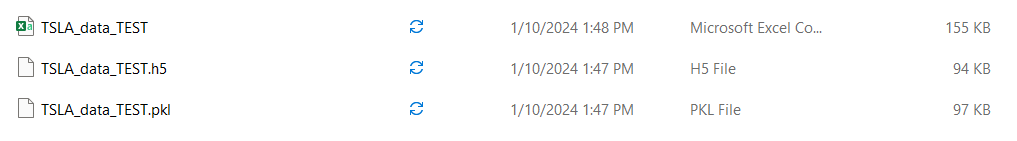

In [ ]:
# # WRITE
# hdf5_file_path = '../Data/TSLA_data.h5'

# # Write the DataFrames to the HDF5 file
# df_prices.to_hdf(hdf5_file_path, key='prices', mode='w')
# df_returns.to_hdf(hdf5_file_path, key='returns', mode='a')
# df_bipower_variation.to_hdf(hdf5_file_path, key='bipower_variation', mode='a')
# df_f0.to_hdf(hdf5_file_path, key='periodicity_0', mode='a')
# df_f1.to_hdf(hdf5_file_path, key='periodicity_1', mode='a')
# df_f.to_hdf(hdf5_file_path, key='periodicity', mode='a')
# df_jump_score.to_hdf(hdf5_file_path, key='jump_score', mode='a')
# df_jumps.to_hdf(hdf5_file_path, key='jumps', mode='a')

# # Create an HDF5 file and write DataFrames to it
# with h5py.File(hdf5_file_path, 'a') as hdf_file:    
#     # Add attributes to the file level
#     hdf_file.attrs['Description'] = 'HDF5 File storing data pipeline'
#     hdf_file.attrs['Start_Date'] = '01-01-2019'
#     hdf_file.attrs['End_Date'] = '01-01-2019'
#     hdf_file.attrs['Start_Time'] = '09:30'
#     hdf_file.attrs['End_Time'] = '16:00'
#     hdf_file.attrs['Time_Zone'] = 'US/Eastern'

In [ ]:
# # READ
# hdf5_file_path = '../Data/TSLA_data.h5'

# # Read the DataFrames from the HDF5 file
# df_prices = pd.read_hdf(hdf5_file_path, key='prices')
# df_returns = pd.read_hdf(hdf5_file_path, key='returns')
# df_bipower_variation = pd.read_hdf(hdf5_file_path, key='bipower_variation')
# df_f0 = pd.read_hdf(hdf5_file_path, key='periodicity_0')
# df_f1 = pd.read_hdf(hdf5_file_path, key='periodicity_1')
# df_f = pd.read_hdf(hdf5_file_path, key='periodicity')
# df_jump_score = pd.read_hdf(hdf5_file_path, key='jump_score')
# df_jumps = pd.read_hdf(hdf5_file_path, key='jumps')

# # Open the HDF5 file to read attributes
# with h5py.File('../Data/TSLA_data.h5', 'r') as hdf_file:
#     # Get the attributes of the root group (the file itself)
#     for attr_name, attr_value in hdf_file.attrs.items():
#         if attr_name not in ['CLASS', 'VERSION', 'PYTABLES_FORMAT_VERSION', 'TITLE']:
#             print(f"{attr_name}: {attr_value}")

<H3 style="color:#8B7959">NEWS</H3>

In [32]:
pipeline_news = News(base_url='https://stocknewsapi.com/api/v1',
                     API_key='7vjl2kzbnxdltdz2hxixyzhbc07yltk4keyh5az9',
                     start_date=datetime(2020, 1, 1),
                     end_date=datetime(2020, 12, 31))

In [33]:
response = pipeline_news.get_news(symbol=['BAC'], news_type='article', all_pages=True)

In [34]:
response

,title,text,source_name,sentiment,type,tickers
date,,,,,,
"Thu, 31 Dec 2020 15:30:38 -0500",Warren Buffett's Top 5 Holdings Post Mixed Per...,With the final day of an interesting and memor...,GuruFocus,Positive,Article,"[AAPL, AXP, BAC, KHC, KO]"
"Thu, 31 Dec 2020 14:08:44 -0500","Bank of America, Ford, General Motors price an...","The U.S. stock market has advanced in 2020, pu...",Invezz,Neutral,Article,"[F, GM, BAC]"
"Thu, 31 Dec 2020 07:30:00 -0500","Despite Interest Rate Headwinds, Bank of Ameri...",After more than a 60% gain since the March 23 ...,Forbes,Positive,Article,[BAC]
"Wed, 30 Dec 2020 11:14:36 -0500",The Fed Unleashed A Mega Bullish Force For The...,These stocks could be the biggest winners in e...,Forbes,Positive,Article,"[BAC, GS, JPM]"
"Tue, 29 Dec 2020 09:44:14 -0500",Top Five US Banks Generate Record $37 Billion ...,Businesses scrambled to raise money in 2020 as...,Benzinga,Positive,Article,"[BAC, C, JPM, MS, WFC]"
...,...,...,...,...,...,...
"Mon, 06 Jan 2020 10:40:32 -0500","Bank of America Stock: Buy, Sell or Hold?",While Buffett is unlikely to increase his stak...,InvestorPlace,Neutral,Article,[BAC]
"Fri, 03 Jan 2020 12:08:00 -0500",A Global Economic Rebound Will Push Bank of Am...,"As goes the economy, so go banks stocks, and t...",InvestorPlace,Positive,Article,[BAC]
"Fri, 03 Jan 2020 11:02:09 -0500",Bank Of America: Stick With This Bank In 2020,Bank Of America: Stick With This Bank In 2020,Seeking Alpha,Positive,Article,[BAC]


In [35]:
date_series = pd.to_datetime(response.reset_index()["date"].unique(), utc=True).sort_values(ascending=True)

start_date = pd.to_datetime("09:30:00", format="%H:%M:%S")
end_date = pd.to_datetime("15:59:00", format="%H:%M:%S")

hour_range = pd.date_range(start=start_date, end=end_date, freq="1min")
date_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2020, 12, 31), freq="D")

df_rows = pd.to_datetime(hour_range).strftime('%H:%M:%S')
df_cols = pd.to_datetime(date_range).strftime('%Y-%m-%d')

df = pd.DataFrame(index=df_rows, columns=df_cols)
df = df.fillna(0)

for date in date_series.unique():

    row = pd.to_datetime(date).replace(second=0).strftime('%H:%M:%S')
    col = pd.to_datetime(date).strftime('%Y-%m-%d')

    try:
        df.at[row, col] += 1
            
    except:
        continue

In [36]:
df

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
09:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09:31:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09:32:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09:33:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09:34:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15:57:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15:58:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.sum().sum()

464